In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    average_precision_score, precision_recall_curve, confusion_matrix,
    roc_curve, auc, RocCurveDisplay, classification_report
)
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import (
    cross_val_score, KFold, cross_validate, train_test_split, RepeatedStratifiedKFold
)
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from google.colab import files


# import library

In [ ]:
# Linear Models
from sklearn.linear_model import LogisticRegression

# Support Vector Machines
from sklearn.svm import SVC, NuSVC

# Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

# Gaussian Processes
from sklearn.gaussian_process import GaussianProcessClassifier

# Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB

# Decision Trees and Ensembles
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, HistGradientBoostingClassifier

import xgboost as xgb

# Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Neural Networks
from sklearn.neural_network import MLPClassifier


In [ ]:
ML_Models = [
    LogisticRegression(),
    SVC(probability=True),  # Enable probability estimates
    NuSVC(probability=True),  # Enable probability estimates
    KNeighborsClassifier(),
    GaussianProcessClassifier(),
    GaussianNB(),
    ComplementNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    HistGradientBoostingClassifier(),
    # xgb.XGBClassifier(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier()
]

In [ ]:
#read dataset
DATASET1 = "https://github.com/pakaremon/An-analysis-of-malicious-behaviors-of-open-source-packages-using-dynamic-analysis/raw/master/dataset/dataset1_for_ml_npm.csv"
DATASET2 = "https://github.com/pakaremon/An-analysis-of-malicious-behaviors-of-open-source-packages-using-dynamic-analysis/raw/master/dataset/dataset2_for_ml_npm.csv"

In [ ]:
#combine dataset
df_dataset1  = pd.read_csv(DATASET1)
df_dataset2  = pd.read_csv(DATASET2)
df_dataset  = pd.concat([df_dataset1, df_dataset2])

In [ ]:
df_dataset.value_counts('Label')

Label
malicious    1402203
benign        699457
Name: count, dtype: int64

In [ ]:
#preparing the dataset
dataset = {} # A dict to stire all package features
#we use three attributes of package: commands, domains and ips
for index, row in df_dataset.iterrows():
  sample_name = str(row['Package_Name']) + '_' + str(row['Package_Version'])
  dataset[sample_name] = {"commands": [], "domains": [], "ips": [], "label": ""}
  dataset[sample_name]['label'] = row['Label']

# we store all the attributes (even a nan)
for index, row in df_dataset.iterrows():
  sample_name = str(row['Package_Name']) + '_' + str(row['Package_Version'])
  if row['Command'] is not np.nan:
    dataset[sample_name]['commands'].append(row['Command'])
  if row['Domains'] is not np.nan:
    dataset[sample_name]['domains'].append(row['Domains'])
  if row['IP_Address'] is not np.nan:
    dataset[sample_name]['ips'].append(row['IP_Address'])

## Features


*   Number of commands (integer)
*   Number of domains (integer)
*   Number of IP addreses (integer)



In [ ]:
# calculating the features's values and stire them in a list
dataset_with_features = []
for sample_name, sample_data in dataset.items():
  dataset_with_features.append([sample_name, len(set(sample_data['commands'])), len(set(sample_data['domains'])), len(set(sample_data['ips'])), sample_data['label']])

In [ ]:
dataset_df = pd.DataFrame(dataset_with_features, columns=['sample_name', 'number_of_commands', 'number_of_domains', 'number_of_ips', 'label'])

# EDR dataset

In [ ]:
dataset_df.head()

,sample_name,number_of_commands,number_of_domains,number_of_ips,label
0,node-sass_9.0.0,910,3,30,benign
1,@nestjs/platform-express_9.3.5,23,2,31,benign
2,json-stable-stringify-without-jsonify_1.0.1,14,1,25,benign
3,@smithy/util-body-length-node_2.1.0,14,1,25,benign
4,concurrently_8.2.1,14,1,25,benign


In [ ]:
dataset_df.describe()

,number_of_commands,number_of_domains,number_of_ips
count,4043.000000,4043.000000,4043.000000
mean,18.317586,1.448677,26.178333
std,17.763192,0.662881,2.281437
min,13.000000,0.000000,2.000000
25%,14.000000,1.000000,25.000000
50%,14.000000,1.000000,25.000000
75%,18.000000,2.000000,27.000000
max,910.000000,11.000000,59.000000


sample_name           0
number_of_commands    0
number_of_domains     0
number_of_ips         0
label                 0
dtype: int64


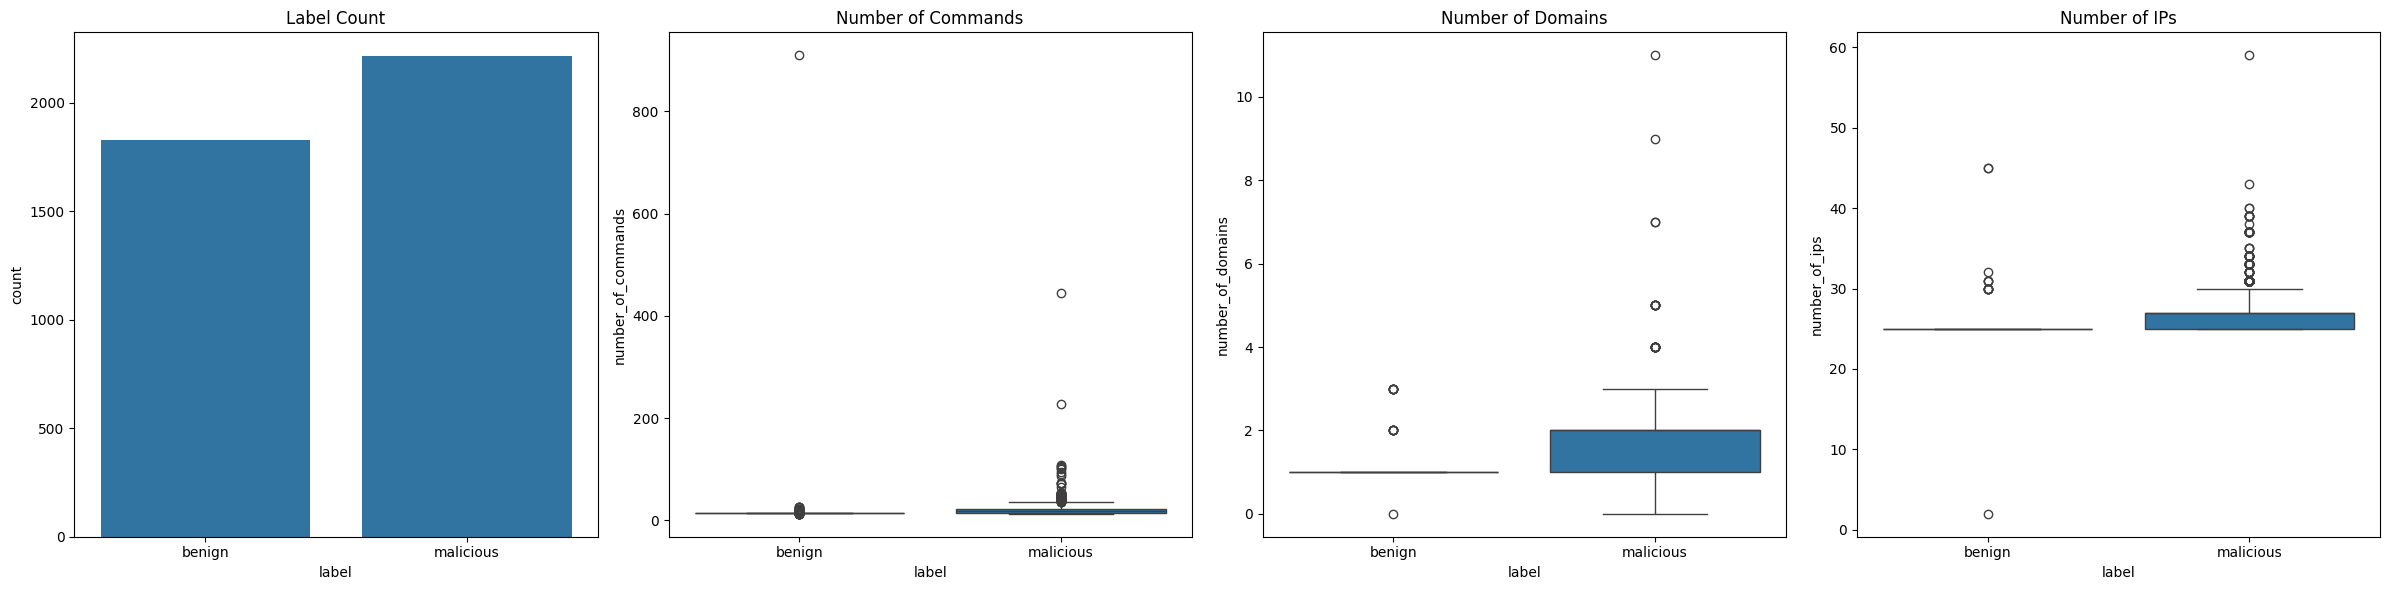

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = dataset_df.copy()

# Check for missing values
print(df.isnull().sum())

# Create a figure with multiple subplots in one row
fig, axes = plt.subplots(1, 4, figsize=(24, 6))  # 1 row, 4 columns

# Plot the count plot
sns.countplot(x='label', data=df, ax=axes[0])
axes[0].set_title('Label Count')

# Plot the boxplot for number_of_commands
sns.boxplot(x='label', y='number_of_commands', data=df, ax=axes[1])
axes[1].set_title('Number of Commands')

# Plot the boxplot for number_of_domains
sns.boxplot(x='label', y='number_of_domains', data=df, ax=axes[2])
axes[2].set_title('Number of Domains')

# Plot the boxplot for number_of_ips
sns.boxplot(x='label', y='number_of_ips', data=df, ax=axes[3])
axes[3].set_title('Number of IPs')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


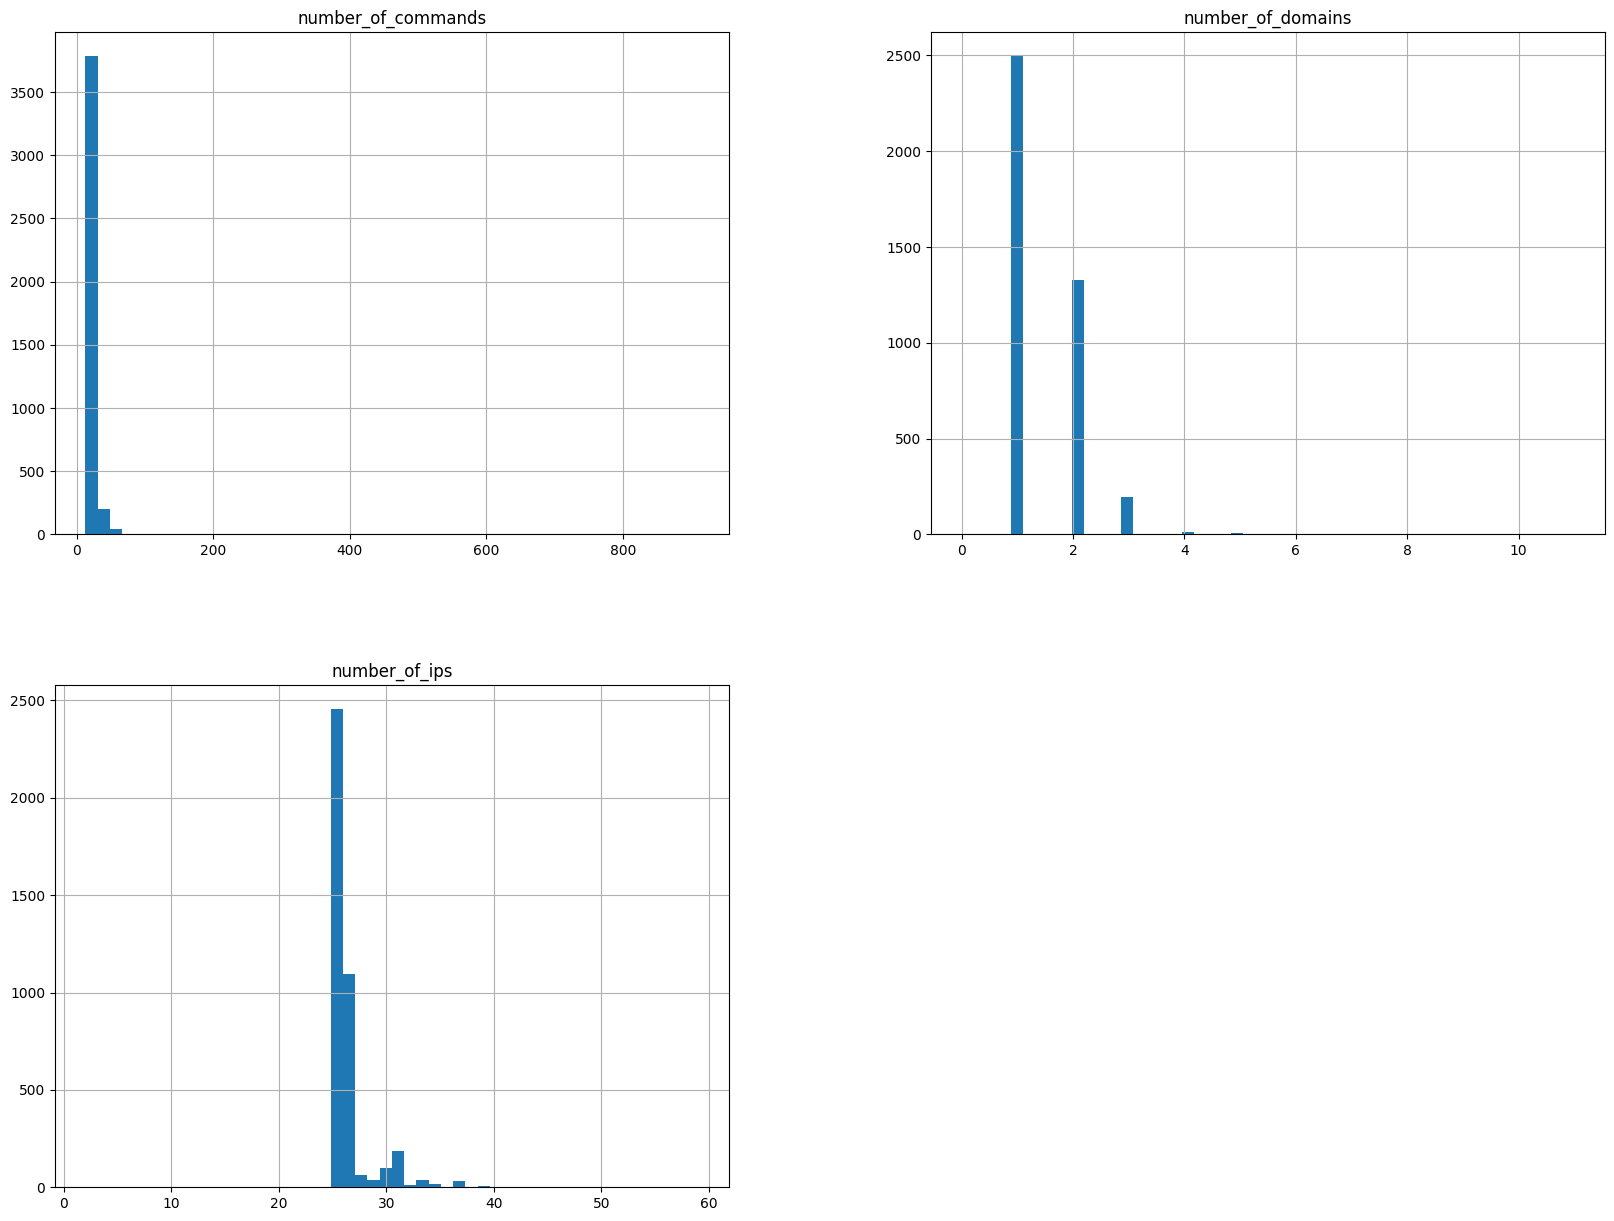

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

dataset_df.hist(bins=50, figsize=(20, 15));

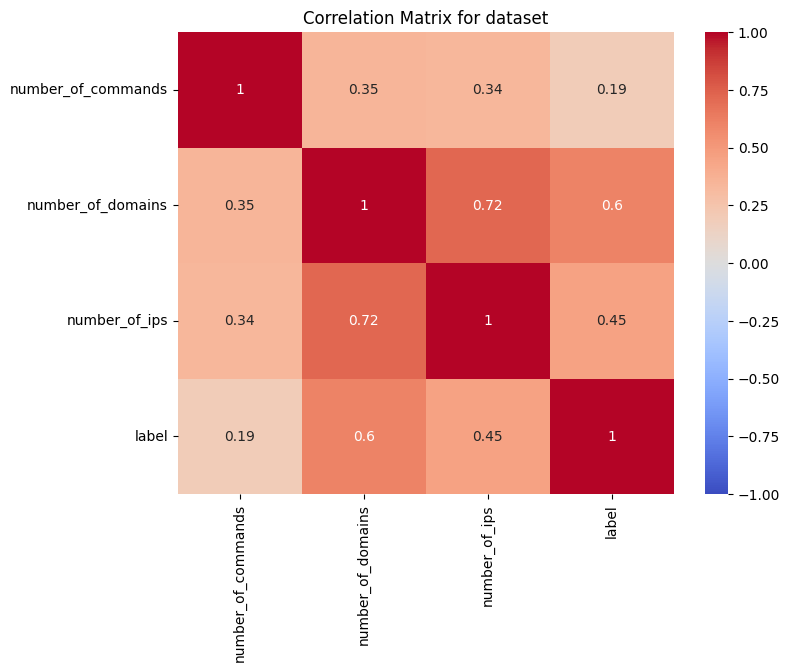

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



# Encode the label column
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

selected_columns = ['number_of_commands', 'number_of_domains', 'number_of_ips', 'label']
df_selected = df[selected_columns]

#  Calculate the correlation matrix for the selected columns
correlation_matrix = df_selected.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

#  Add title and labels
plt.title('Correlation Matrix for dataset')
plt.show()

In [ ]:
df = df.reindex(np.random.permutation(df.index)) # shuffle the training set

# Data preprocessing

In [ ]:
# A list of feature names
feature_cols = ['number_of_commands', 'number_of_domains', 'number_of_ips']

In [ ]:
# Split the dataset to training (80%) and test set (20%)
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# We want all rows, and the feature_cols' columns
X_train = train.loc[:, feature_cols]
X_train.shape

(3234, 3)

In [ ]:
# now we want to create our response vector
Y_train = train.label
Y_train.shape

(3234,)

In [ ]:
# Now create a test set
X_test = test.loc[:, feature_cols]

X_test.shape

(809, 3)

In [ ]:
# now we want to create our response vector
Y_test = test.label
Y_test.shape

(809,)

In [ ]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

In [ ]:
# for cross-validation pipeline
X = df.loc[:, feature_cols]
Y = df.label

In [ ]:
#ref: https://machinelearningcoban.com/tabml_book/ch_data_processing/process_outliers.html
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

In [ ]:
# handle outliers
clipper_commands = BoxplotOutlierClipper(whisker_coeff=1.5)
clipper_domains = BoxplotOutlierClipper(whisker_coeff=1.5)
clipper_ips = BoxplotOutlierClipper(whisker_coeff=1.5)

# Fit the clipper to the specified columns
clipper_commands.fit(X_train['number_of_commands'])
clipper_domains.fit(X_train['number_of_domains'])
clipper_ips.fit(X_train['number_of_ips'])

# Transform the specified columns
X_train['number_of_commands'] = clipper_commands.transform(X_train['number_of_commands'])
X_train['number_of_domains'] = clipper_domains.transform(X_train['number_of_domains'])
X_train['number_of_ips'] = clipper_ips.transform(X_train['number_of_ips'])

X_test['number_of_commands'] = clipper_commands.transform(X_test['number_of_commands'])
X_test['number_of_domains'] = clipper_domains.transform(X_test['number_of_domains'])
X_test['number_of_ips'] = clipper_ips.transform(X_test['number_of_ips'])


In [ ]:
#normalization using min-max scaler
scaler = MinMaxScaler()

scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 10 cross-validation for different ML algorithms

In [ ]:
# custom FPR and FNR

def fpr_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return fp / (fp + tn)

def fnr_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return fn / (fn + tp)







/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

                             Model  Accuracy  Precision    Recall        F1  \
0               LogisticRegression  0.829579   0.860457  0.843245  0.828199   
1                              SVC  0.834280   0.863042  0.847344  0.832996   
2                            NuSVC  0.828094   0.859374  0.841807  0.826655   
3             KNeighborsClassifier  0.890921   0.898068  0.898010  0.890583   
4        GaussianProcessClassifier  0.829579   0.860457  0.843245  0.828199   
5                       GaussianNB  0.831807   0.860941  0.844710  0.830415   
6                     ComplementNB  0.837498   0.864999  0.850314  0.836329   
7           DecisionTreeClassifier  0.889438   0.895978  0.896413  0.889114   
8           RandomForestClassifier  0.890922   0.897123  0.897751  0.890599   
9             ExtraTreesClassifier  0.890426   0.896876  0.897329  0.890099   
10      GradientBoostingClassifier  0.889193   0.894956  0.895837  0.888874   
11              AdaBoostClassifier  0.890678   0.895

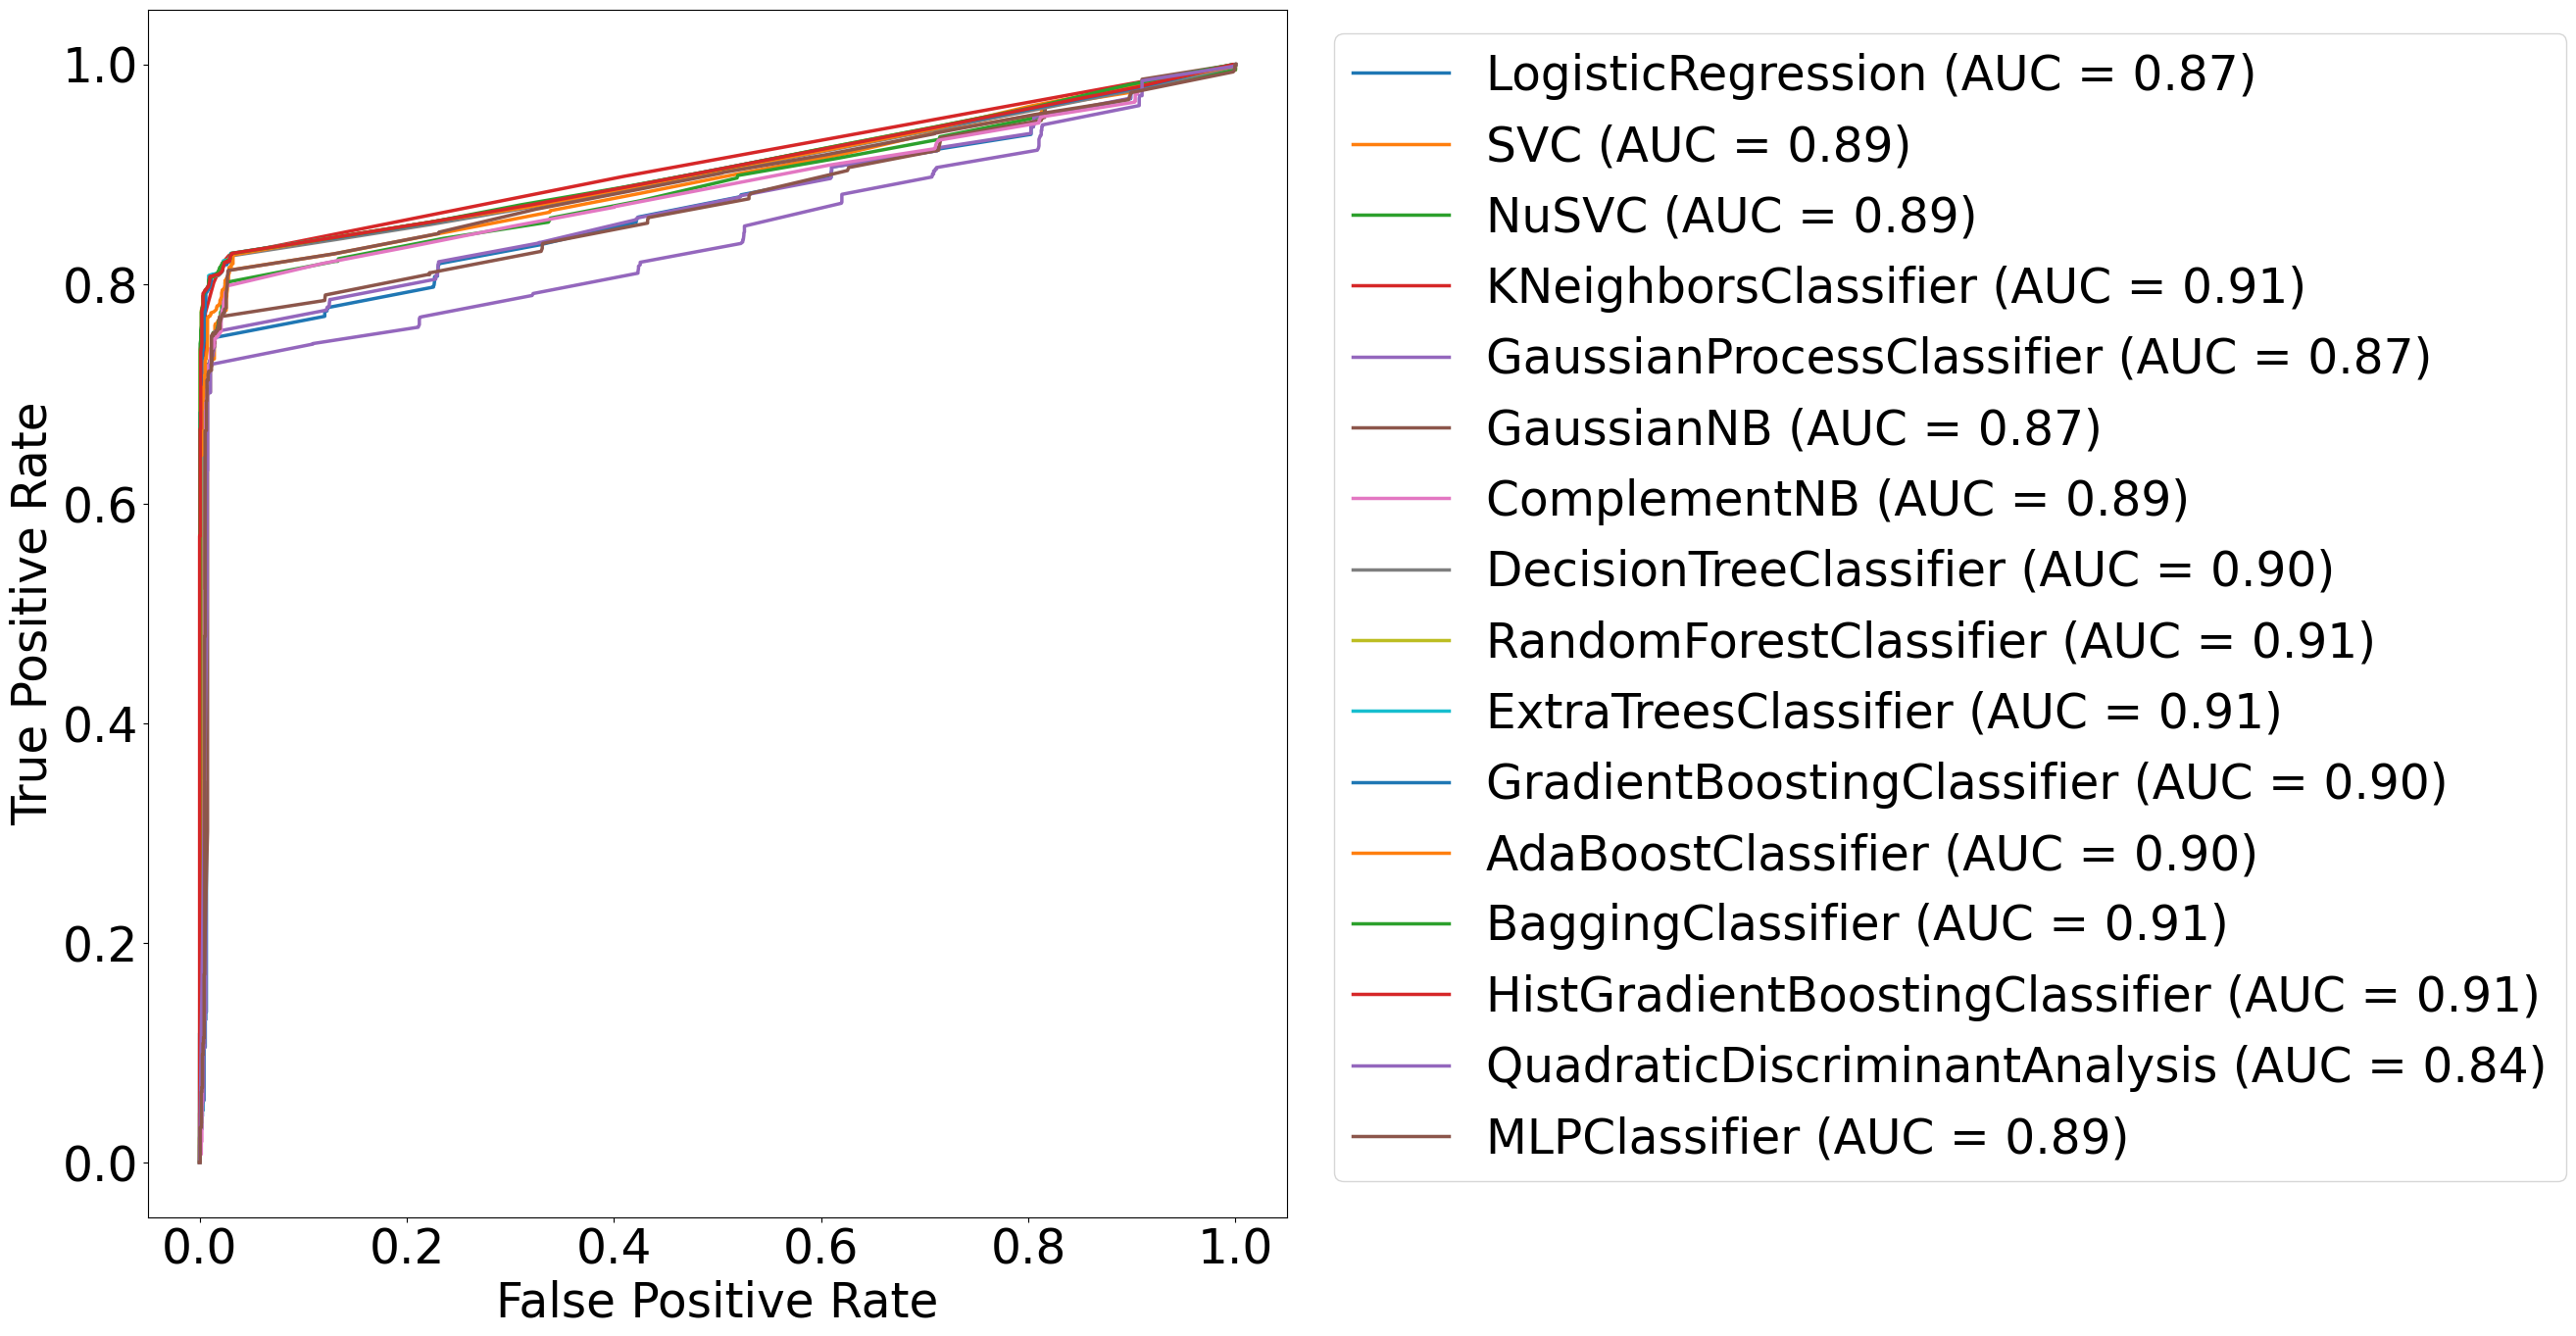

In [ ]:

results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'FPR', 'FNR', 'AUC'])
roc_data = {}

# Cross-validation setup
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'precision': make_scorer(precision_score, average='macro'),
    'fpr': make_scorer(fpr_score),
    'fnr': make_scorer(fnr_score),
    'auc': make_scorer(roc_auc_score, average='macro', needs_proba=True)
}

# Loop through each model and compute cross-validated scores
for model in ML_Models:
    model_name = model.__class__.__name__
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', model)
    ])

    all_fpr = []
    all_tpr = []
    all_y_true = []
    all_y_pred_prob = []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

        pipeline.fit(X_train, Y_train)
        y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
        all_y_true.extend(Y_test)
        all_y_pred_prob.extend(y_pred_prob)

    fpr, tpr, _ = roc_curve(all_y_true, all_y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_data[model_name] = (fpr, tpr, roc_auc)

    scores = cross_validate(pipeline, X, Y, cv=kfold, scoring=scoring, return_train_score=False)
    model_results = {
        'Model': model_name,
        'Accuracy': np.mean(scores['test_accuracy']),
        'Precision': np.mean(scores['test_precision']),
        'Recall': np.mean(scores['test_recall']),
        'F1': np.mean(scores['test_f1_score']),
        'FPR': np.mean(scores['test_fpr']),
        'FNR': np.mean(scores['test_fnr']),
        'AUC': np.mean(scores['test_auc'])
    }

    # Append the results to the DataFrame
    results_df = pd.concat([results_df, pd.DataFrame(model_results, index=[0])], ignore_index=True)

# Optionally, save the results to a CSV file
results_df.to_csv('model_results.csv', index=False)

plt.rcParams.update({'font.size': 35})

# Initialize plot with larger figure size
plt.figure(figsize=(15, 16))

# Plot ROC curve for each model
for i, (model_name, (fpr, tpr, roc_auc)) in enumerate(roc_data.items()):
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', linewidth=2.5)

# Add plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), prop={'size': 35})

# Save the plot
plt.savefig('roc_curves.png', bbox_inches='tight')  # Save with tight bounding box

# Display the DataFrame
print(results_df)
# Show plot
plt.show()

                             Model  Accuracy  Precision    Recall        F1  \
13  HistGradientBoostingClassifier  0.889685   0.896051  0.896574  0.889353   
8           RandomForestClassifier  0.890922   0.897123  0.897751  0.890599   
9             ExtraTreesClassifier  0.890426   0.896876  0.897329  0.890099   
12               BaggingClassifier  0.888944   0.895399  0.895822  0.888611   
10      GradientBoostingClassifier  0.889193   0.894956  0.895837  0.888874   
3             KNeighborsClassifier  0.890921   0.898068  0.898010  0.890583   
7           DecisionTreeClassifier  0.889438   0.895978  0.896413  0.889114   
11              AdaBoostClassifier  0.890678   0.895677  0.896955  0.890348   
1                              SVC  0.834280   0.863042  0.847344  0.832996   
2                            NuSVC  0.828094   0.859374  0.841807  0.826655   
4        GaussianProcessClassifier  0.829579   0.860457  0.843245  0.828199   
15                   MLPClassifier  0.847638   0.870

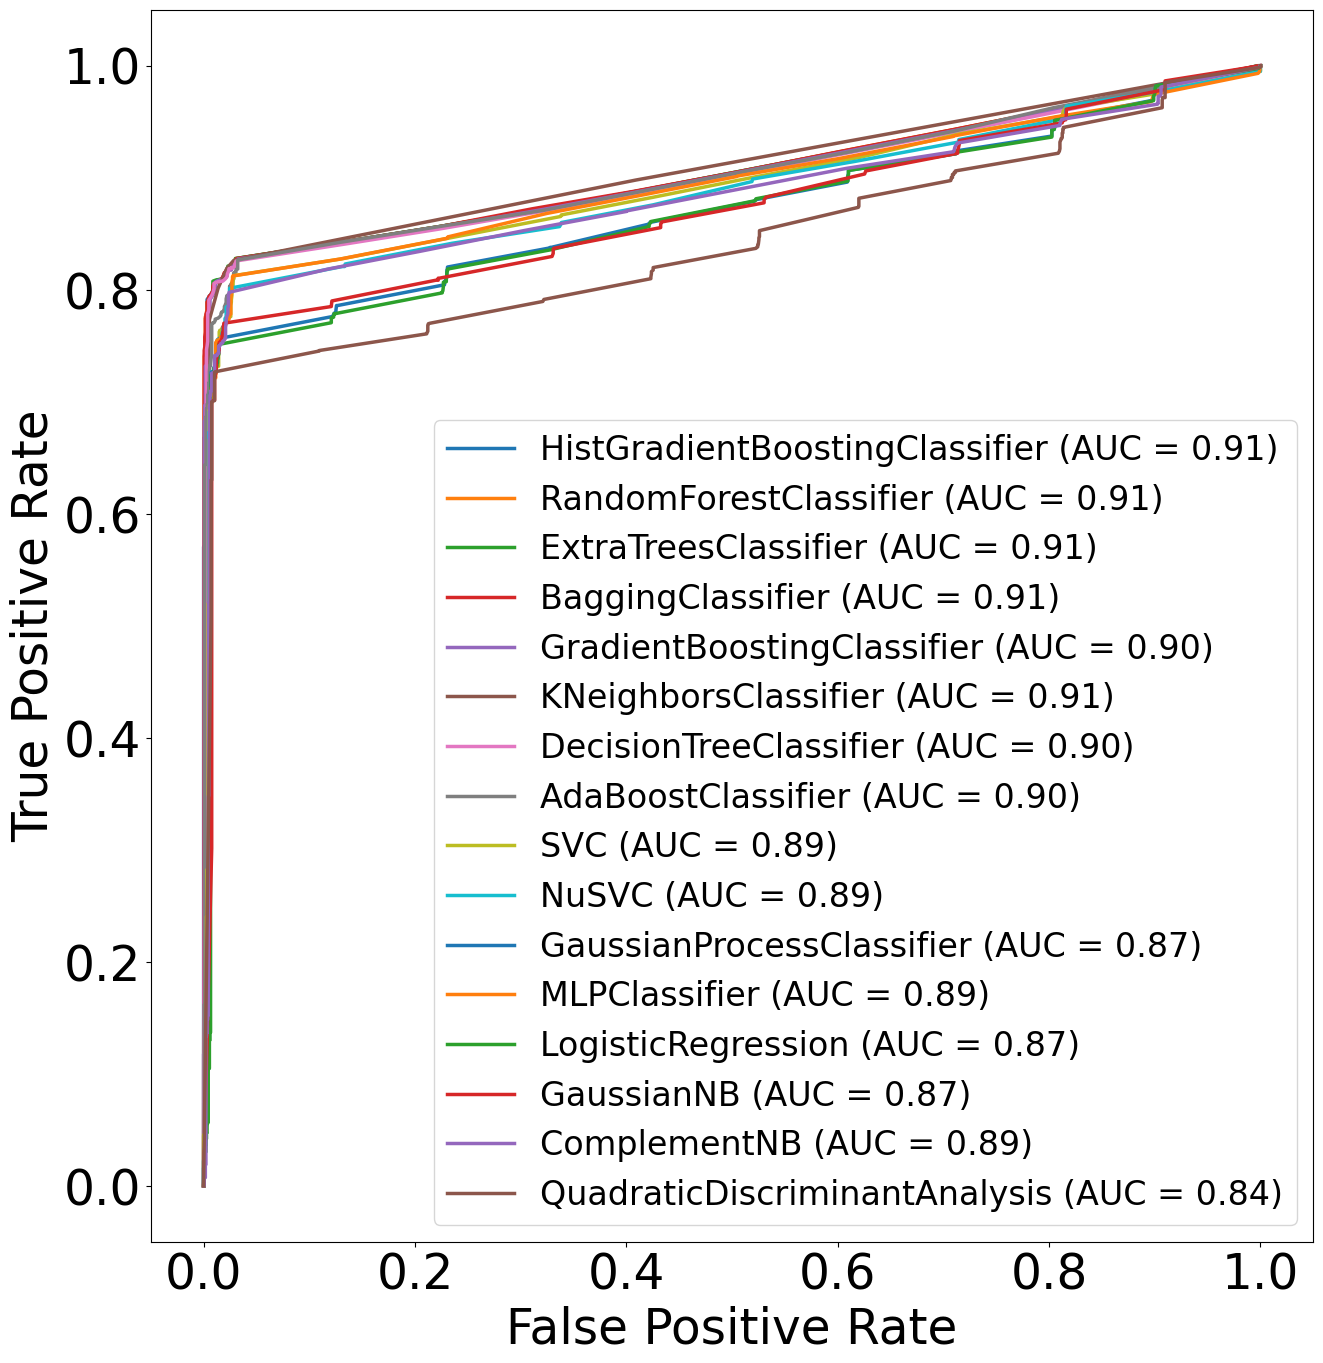

In [ ]:
#adjust plot
# Sort the results by AUC and get the top 7 models
top_7_models = results_df.nlargest(17, 'AUC')

plt.rcParams.update({'font.size': 35})

# Initialize plot with larger figure size
plt.figure(figsize=(15, 16))

# Plot ROC curve for each of the top 7 models
for model_name in top_7_models['Model']:
    fpr, tpr, roc_auc = roc_data[model_name]
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', linewidth=2.5)

# Add plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', prop={'size': 24})

# Save the plot
plt.savefig('roc_curves.png', bbox_inches='tight')  # Save with tight bounding box

# Display the DataFrame of top 7 models
print(top_7_models)
# Show plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

                             Model  Train Accuracy  Test Accuracy  \
0               LogisticRegression        0.829609       0.829579   
1                              SVC        0.835545       0.834280   
2                            NuSVC        0.829087       0.828094   
3             KNeighborsClassifier        0.892242       0.890921   
4        GaussianProcessClassifier        0.829609       0.829579   
5                       GaussianNB        0.832880       0.831807   
6                     ComplementNB        0.835985       0.837498   
7           DecisionTreeClassifier        0.894001       0.889438   
8           RandomForestClassifier        0.894001       0.890675   
9             ExtraTreesClassifier        0.894001       0.890427   
10      GradientBoostingClassifier        0.893368       0.889193   
11              AdaBoostClassifier        0.891142       0.890430   
12               BaggingClassifier        0.893726       0.888203   
13  HistGradientBoostingClassifier

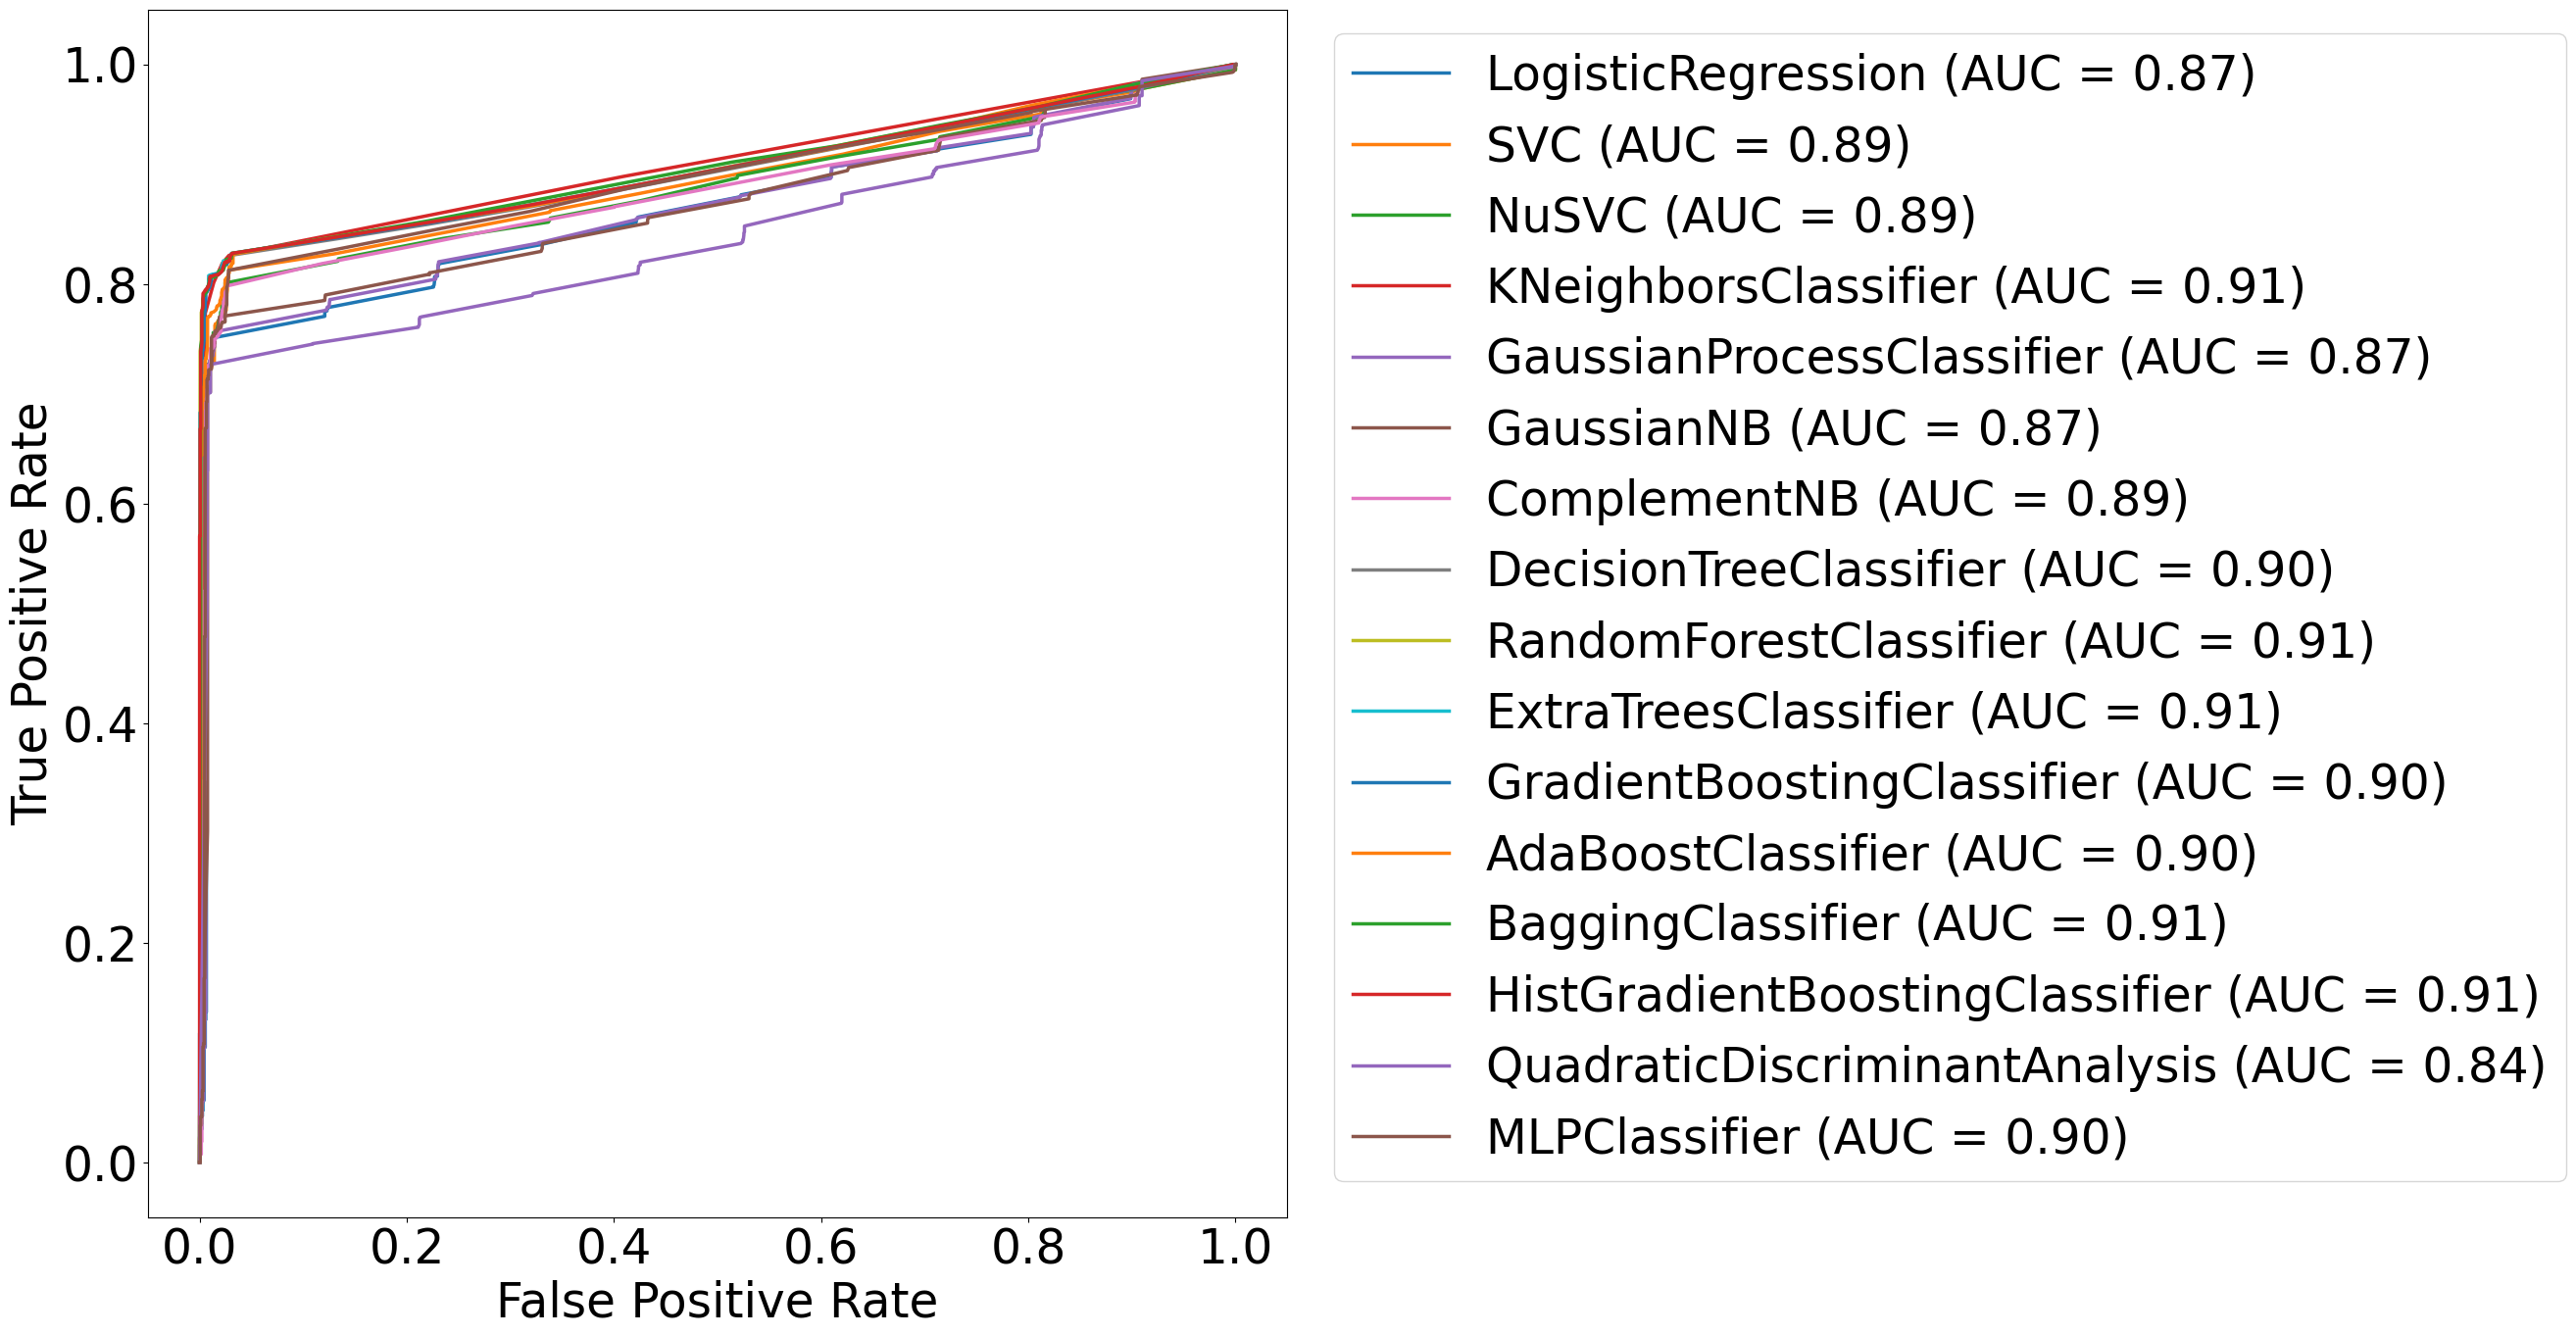

In [40]:

# Custom scorers for FPR and FNR
def fpr_score(y_true, y_pred):
    fp = np.sum((y_pred == 1) & (y_true == 0))
    tn = np.sum((y_pred == 0) & (y_true == 0))
    return fp / (fp + tn)

def fnr_score(y_true, y_pred):
    fn = np.sum((y_pred == 0) & (y_true == 1))
    tp = np.sum((y_pred == 1) & (y_true == 1))
    return fn / (fn + tp)

results_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision', 'Train Recall', 'Test Recall', 'Train F1', 'Test F1', 'Train FPR', 'Test FPR', 'Train FNR', 'Test FNR', 'Train AUC', 'Test AUC'])
roc_data = {}

# Cross-validation setup
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'precision': make_scorer(precision_score, average='macro'),
    'fpr': make_scorer(fpr_score),
    'fnr': make_scorer(fnr_score),
    'auc': make_scorer(roc_auc_score, average='macro', needs_proba=True)
}

# Loop through each model and compute cross-validated scores
for model in ML_Models:
    model_name = model.__class__.__name__
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', model)
    ])

    all_fpr = []
    all_tpr = []
    all_y_true = []
    all_y_pred_prob = []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

        pipeline.fit(X_train, Y_train)
        y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
        all_y_true.extend(Y_test)
        all_y_pred_prob.extend(y_pred_prob)

    fpr, tpr, _ = roc_curve(all_y_true, all_y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_data[model_name] = (fpr, tpr, roc_auc)

    scores = cross_validate(pipeline, X, Y, cv=kfold, scoring=scoring, return_train_score=True)
    model_results = {
        'Model': model_name,
        'Train Accuracy': np.mean(scores['train_accuracy']),
        'Test Accuracy': np.mean(scores['test_accuracy']),
        'Train Precision': np.mean(scores['train_precision']),
        'Test Precision': np.mean(scores['test_precision']),
        'Train Recall': np.mean(scores['train_recall']),
        'Test Recall': np.mean(scores['test_recall']),
        'Train F1': np.mean(scores['train_f1_score']),
        'Test F1': np.mean(scores['test_f1_score']),
        'Train FPR': np.mean(scores['train_fpr']),
        'Test FPR': np.mean(scores['test_fpr']),
        'Train FNR': np.mean(scores['train_fnr']),
        'Test FNR': np.mean(scores['test_fnr']),
        'Train AUC': np.mean(scores['train_auc']),
        'Test AUC': np.mean(scores['test_auc'])
    }

    # Append the results to the DataFrame
    results_df = pd.concat([results_df, pd.DataFrame(model_results, index=[0])], ignore_index=True)

# Optionally, save the results to a CSV file
results_df.to_csv('model_results.csv', index=False)

plt.rcParams.update({'font.size': 35})

# Initialize plot with larger figure size
plt.figure(figsize=(15, 16))

# Plot ROC curve for each model
for i, (model_name, (fpr, tpr, roc_auc)) in enumerate(roc_data.items()):
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', linewidth=2.5)

# Add plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), prop={'size': 35})

# Save the plot
plt.savefig('roc_curves.png', bbox_inches='tight')  # Save with tight bounding box

# Display the DataFrame
print(results_df)
# Show plot
plt.show()

In [41]:
# Create separate DataFrames for train and test metrics
train_metrics_df = results_df[['Model', 'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1', 'Train FPR', 'Train FNR', 'Train AUC']].copy()
test_metrics_df = results_df[['Model', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1', 'Test FPR', 'Test FNR', 'Test AUC']].copy()

# Rename columns for clarity
train_metrics_df.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'FPR', 'FNR', 'AUC']
test_metrics_df.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'FPR', 'FNR', 'AUC']
train_metrics_df.sort_values(by='AUC', ascending=False).to_csv("10-cross-validation on trainning set.csv", index=False)
test_metrics_df.sort_values(by='AUC', ascending=False).to_csv("10-cross-validation on test set.csv", index=False)

                             Model  Accuracy  Precision    Recall        F1  \
13  HistGradientBoostingClassifier  0.889685   0.896051  0.896574  0.889353   
8           RandomForestClassifier  0.890675   0.896811  0.897469  0.890351   
9             ExtraTreesClassifier  0.890427   0.896769  0.897292  0.890101   
10      GradientBoostingClassifier  0.889193   0.894956  0.895837  0.888874   
12               BaggingClassifier  0.888203   0.894553  0.895024  0.887862   
3             KNeighborsClassifier  0.890921   0.898068  0.898010  0.890583   
7           DecisionTreeClassifier  0.889438   0.895978  0.896413  0.889114   
11              AdaBoostClassifier  0.890430   0.895483  0.896724  0.890099   
1                              SVC  0.834280   0.863042  0.847344  0.832996   
2                            NuSVC  0.828094   0.859374  0.841807  0.826655   
15                   MLPClassifier  0.846398   0.869539  0.858001  0.845457   
4        GaussianProcessClassifier  0.829579   0.860

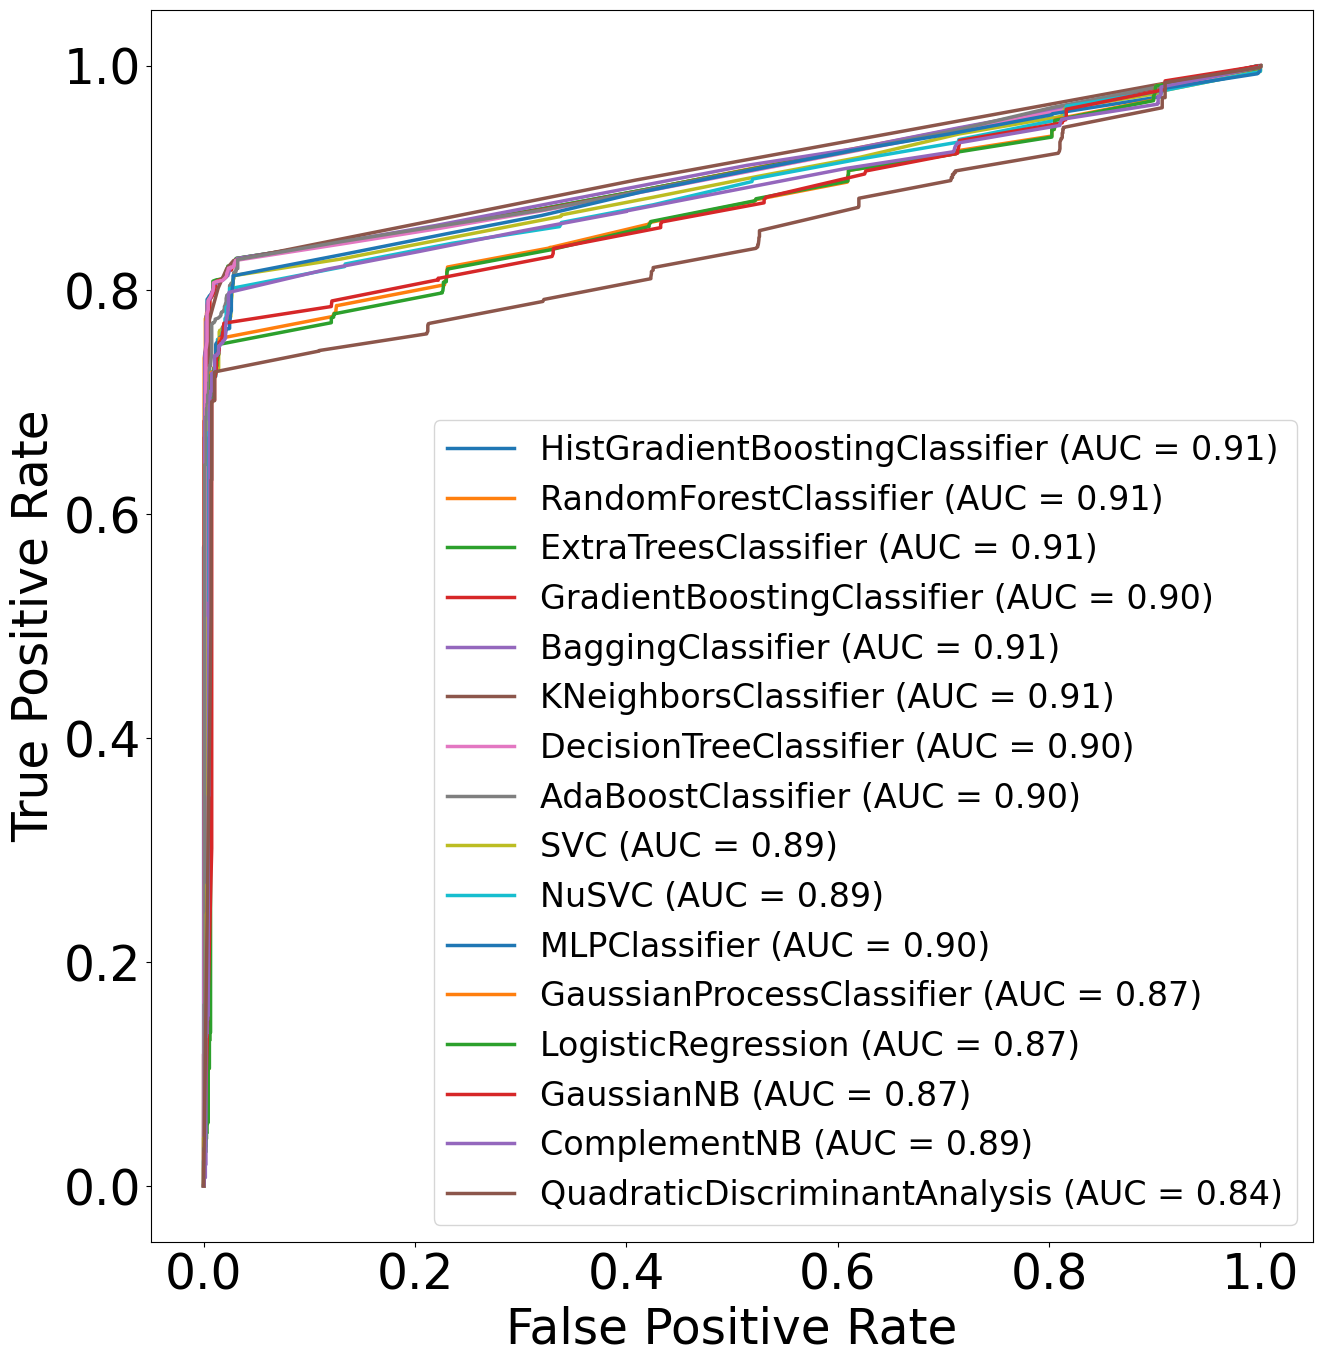

In [44]:
# Sort the results by AUC and get the top 7 models
top_7_models = test_metrics_df.nlargest(17, 'AUC')

plt.rcParams.update({'font.size': 35})

# Initialize plot with larger figure size
plt.figure(figsize=(15, 16))

# Plot ROC curve for each of the top 7 models
for model_name in top_7_models['Model']:
    fpr, tpr, roc_auc = roc_data[model_name]
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', linewidth=2.5)

# Add plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', prop={'size': 24})

# Save the plot
plt.savefig('roc_curves.png', bbox_inches='tight')  # Save with tight bounding box

# Display the DataFrame of top 7 models
print(top_7_models)
# Show plot
plt.show()

In [45]:
#result of train dataset on 10 cross-validation
train_metrics_df

,Model,Accuracy,Precision,Recall,F1,FPR,FNR,AUC
0,LogisticRegression,0.829609,0.860418,0.843847,0.828782,0.006562,0.305744,0.890701
1,SVC,0.835545,0.864253,0.849318,0.834860,0.006075,0.295289,0.892325
2,NuSVC,0.829087,0.860281,0.843407,0.828235,0.006137,0.307049,0.891710
3,KNeighborsClassifier,0.892242,0.898795,0.899752,0.892233,0.021435,0.179061,0.909245
4,GaussianProcessClassifier,0.829609,0.860418,0.843847,0.828782,0.006562,0.305744,0.890728
5,GaussianNB,0.832880,0.861907,0.846702,0.832145,0.008313,0.298283,0.888891
6,ComplementNB,0.835985,0.864021,0.849614,0.835339,0.007292,0.293481,0.890430
7,DecisionTreeClassifier,0.894001,0.900471,0.901488,0.893992,0.019861,0.177162,0.911605
8,RandomForestClassifier,0.894001,0.900310,0.901420,0.893991,0.020651,0.176510,0.911092
9,ExtraTreesClassifier,0.894001,0.900471,0.901488,0.893992,0.019861,0.177162,0.911605


In [46]:
#result of test dataset on 10 cross-validation
test_metrics_df

,Model,Accuracy,Precision,Recall,F1,FPR,FNR,AUC
0,LogisticRegression,0.829579,0.860457,0.843245,0.828199,0.006671,0.306839,0.890399
1,SVC,0.834280,0.863042,0.847344,0.832996,0.007804,0.297508,0.892404
2,NuSVC,0.828094,0.859374,0.841807,0.826655,0.007226,0.309159,0.891782
3,KNeighborsClassifier,0.890921,0.898068,0.898010,0.890583,0.022054,0.181927,0.908058
4,GaussianProcessClassifier,0.829579,0.860457,0.843245,0.828199,0.006671,0.306839,0.890739
5,GaussianNB,0.831807,0.860941,0.844710,0.830415,0.010695,0.299885,0.889661
6,ComplementNB,0.837498,0.864999,0.850314,0.836329,0.007812,0.291559,0.889544
7,DecisionTreeClassifier,0.889438,0.895978,0.896413,0.889114,0.025754,0.181420,0.908057
8,RandomForestClassifier,0.890675,0.896811,0.897469,0.890351,0.026319,0.178744,0.910196
9,ExtraTreesClassifier,0.890427,0.896769,0.897292,0.890101,0.025754,0.179661,0.909901
